In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.cm as cm

In [55]:
# Cargar los datos
df = pd.read_csv('./framingham.csv')

In [57]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [59]:
# Remover campos con datos faltantes
df = df.dropna()

In [61]:
# Establecer una semilla para reproducibilidad
np.random.seed(1234)

In [63]:
# Tomar una muestra aleatoria de 500 observaciones
smp = df.sample(n=500)

In [65]:
# Gráfico de dispersión bivariado y curva de regresión logística
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [67]:
# Preparar los datos para la regresión logística
X = smp[['age']]  # Variable independiente
y = smp['TenYearCHD']  # Variable dependiente

In [69]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Estandarizar las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Crear un modelo de regresión logística
modelo = LogisticRegression()

In [75]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LogisticRegression()

In [77]:
# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [79]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 90.00%


In [81]:
# Mostrar la matriz de confusión y el informe de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[90  0]
 [10  0]]


In [83]:
report = classification_report(y_test, y_pred, zero_division=1)
print('Informe de Clasificación:')
print(report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       1.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.95      0.50      0.47       100
weighted avg       0.91      0.90      0.85       100



In [85]:
# Gráfica de la curva de regresión logística
x = np.linspace(X['age'].min(), X['age'].max(), 100).reshape(-1, 1)
x_df = pd.DataFrame({'age': x[:, 0]})
x_scaled = scaler.transform(x_df)
y_prob = modelo.predict_proba(x_scaled)[:, 1]

In [87]:
# Colormap de estilo arcoíris para colorear los puntos
colors = cm.rainbow(np.linspace(0, 1, len(smp)))

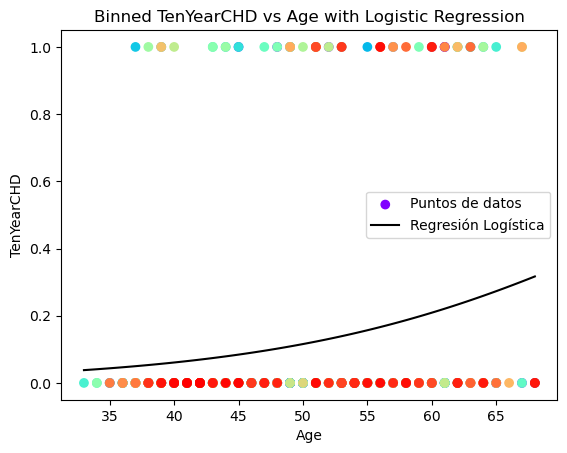

In [89]:
# Gráfico de puntos con regresión logística
plt.scatter(smp['age'], smp['TenYearCHD'], color=colors, label='Puntos de datos')
plt.plot(x, y_prob, color='black', label='Regresión Logística')
plt.xlabel('Age')
plt.ylabel('TenYearCHD')
plt.title('Binned TenYearCHD vs Age with Logistic Regression')
plt.legend()
plt.show()